C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

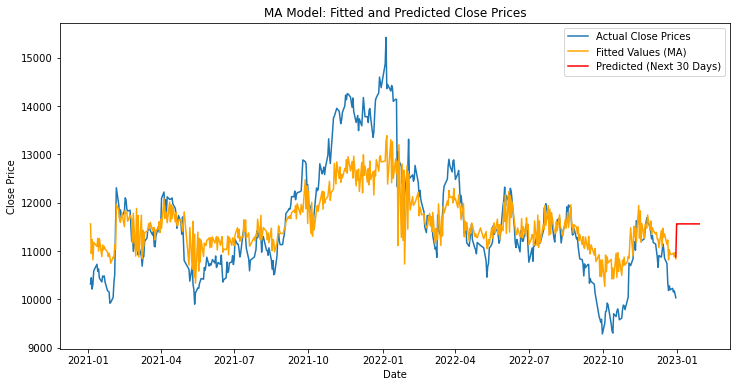

                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                  489
Model:                     ARMA(0, 1)   Log Likelihood               -3877.977
Method:                       css-mle   S.D. of innovations            671.961
Date:                Wed, 02 Oct 2024   AIC                           7761.953
Time:                        16:36:08   BIC                           7774.530
Sample:                             0   HQIC                          7766.893
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.156e+04     56.030    206.384      0.000    1.15e+04    1.17e+04
ma.L1.Close     0.8456      0.018     47.306      0.000       0.811       0.881
                                    Roots       

In [1]:
import pandas_datareader.data as pdr
import statsmodels.api as sm
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd

# データの取得
df = pdr.DataReader("6758.JP", "stooq").sort_index()

# 日付範囲の選択（2021年1月1日から2022年12月31日まで）
df_selected = df[dt.datetime(2021,1,1):dt.datetime(2022,12,31)]

# 終値を使う
close_prices = df_selected["Close"]

# 移動平均モデル(MA)の作成とフィット（AR=0, MA=1のモデル）
ma_model = sm.tsa.ARIMA(close_prices, order=(0, 0, 1))
ma_fit = ma_model.fit()

# フィッティング結果
fitted_values = ma_fit.fittedvalues

# 未来の予測（30日間）
forecast_values = ma_fit.forecast(steps=30)[0]  # 予測値だけを取り出す

# 結果のプロット
plt.figure(figsize=(12,6))

# 実データのプロット
plt.plot(close_prices.index, close_prices, label="Actual Close Prices")

# フィッティング結果のプロット
plt.plot(close_prices.index, fitted_values, label="Fitted Values (MA)", color="orange")

# 未来の予測結果（30日間）のプロット
plt.plot(pd.date_range(close_prices.index[-1], periods=30, freq='D'), forecast_values, label="Predicted (Next 30 Days)", color="red")

# プロットの設定
plt.legend()
plt.title("MA Model: Fitted and Predicted Close Prices")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

# モデルの詳細
print(ma_fit.summary())
